# Exploratory Data Analysis on Heart Failure Clinical Data

The data is sourced from : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

Here we will go through the past data and determine how the factors affect a person's heart. Then we will predict death events based on past data.

# Importing the libraries need for the whole operation

We need Pandas to read the data and do manipulation, Numpy to make arrays, matplotlib and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir('C:\\Users\\Subhadeep Sarkar\\Downloads')

# Importing the dataset

In [2]:
heart=pd.read_csv('heart2.csv')

In [3]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


We will see the shape and size of our dataset

In [4]:
heart.shape

(299, 13)

As we can see there are 299 rows and 13 columns

Now we will list the columns and see what represents what.

In [5]:
columns=heart.columns
columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

age= age in years /
sex= gender (1 = male; 0 = female)
creatinine_phosphokinase= Level of the CPK enzyme in the blood (mcg/L)
anaemia = Decrease of red blood cells or hemoglobin (boolean)
serum_creatinine = Level of serum creatinine in the blood (mg/dL)
diabetes= If the patient has diabetes (boolean)
serum_sodium =  Level of serum sodium in the blood (mEq/L)
ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage
high_blood_pressure = If the patient has hypertension (boolean)
platelets = Platelets in the blood (kiloplatelets/mL)
smoking = If the person smokes (boolean) 
DEATH_EVENT = If the person dies (boolean)

In [6]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Let's take a look a look at the data of the table. As we can see, all of the 299 values are not null.

In [7]:
heart.smoking.replace({1: "smoker", 0: "non_smoker"}, inplace=True) 
heart.smoking
heart.sex.replace({1:"Male", 0:"Female"}, inplace=True)
heart.sex

0        Male
1        Male
2        Male
3        Male
4      Female
        ...  
294      Male
295    Female
296    Female
297      Male
298      Male
Name: sex, Length: 299, dtype: object

The smokers are identified as 0 and non smokers are identified as 1. We can change the 0 or 1 to smoker and on smoker respectively. Same we can do for the sex column also where 0 is female and 1 is male

In [8]:
heart['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

This gives us the values of Male and female patients

In [9]:
heart['smoking'].value_counts()

non_smoker    203
smoker         96
Name: smoking, dtype: int64

This gives us the values of smoker and non smoker patients

# Visualizations

Here we are goiong to turn our data into images so that we can understand in a better way. 

Here is the pie chart of smoker and non smokers.

<AxesSubplot:ylabel='None'>

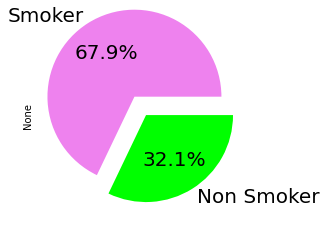

In [10]:
heart.groupby('smoking').size().plot(kind='pie', autopct='%1.1f%%', labels=['Smoker','Non Smoker'], textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], explode=[0.25,0])


This gives us the pie chart of Male and female patients

<AxesSubplot:ylabel='None'>

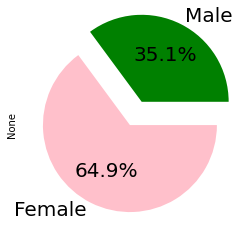

In [11]:
heart.groupby('sex').size().plot(kind='pie', autopct='%1.1f%%', labels=['Male','Female'], textprops={'fontsize': 20},
                                 colors=['green', 'pink'], explode=[0.3,0])


# Correlation matrix

Now we are gonna check the correlation btween the factors here.

We use heatmap to make it more understandable.

<AxesSubplot:>

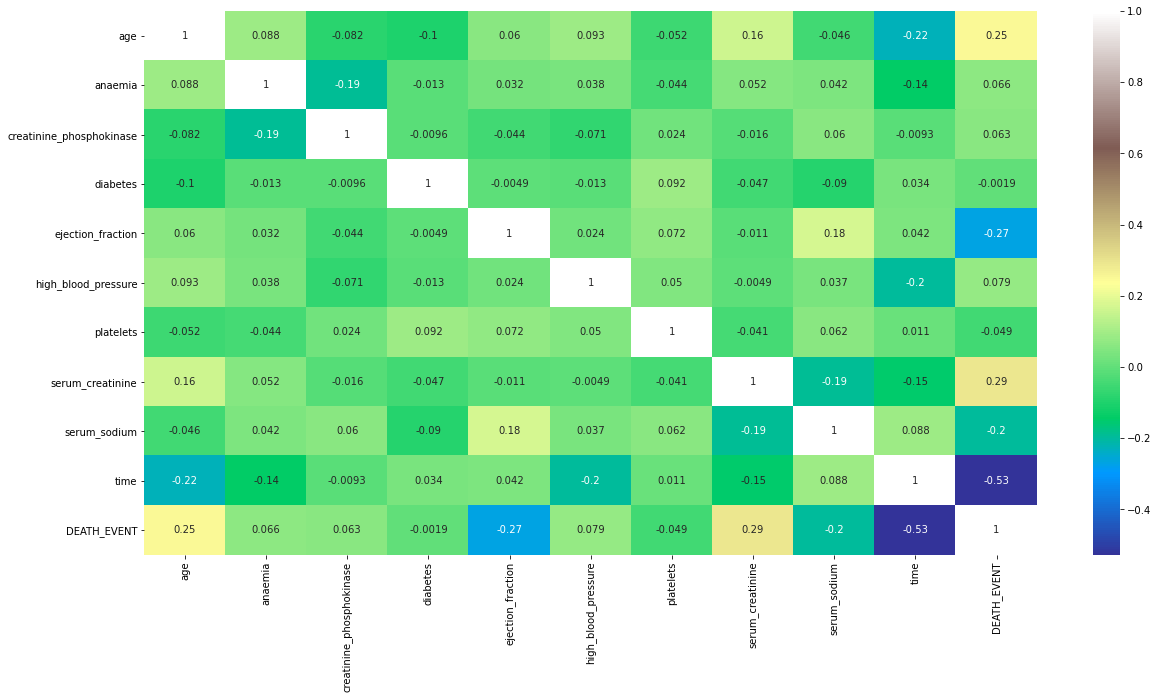

In [12]:
corr=heart.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data=corr,cmap='terrain',annot=True, cbar=True)

Here we can seee detailed relations between two factors in different kind of plots. 


We use pairplot for this operation.

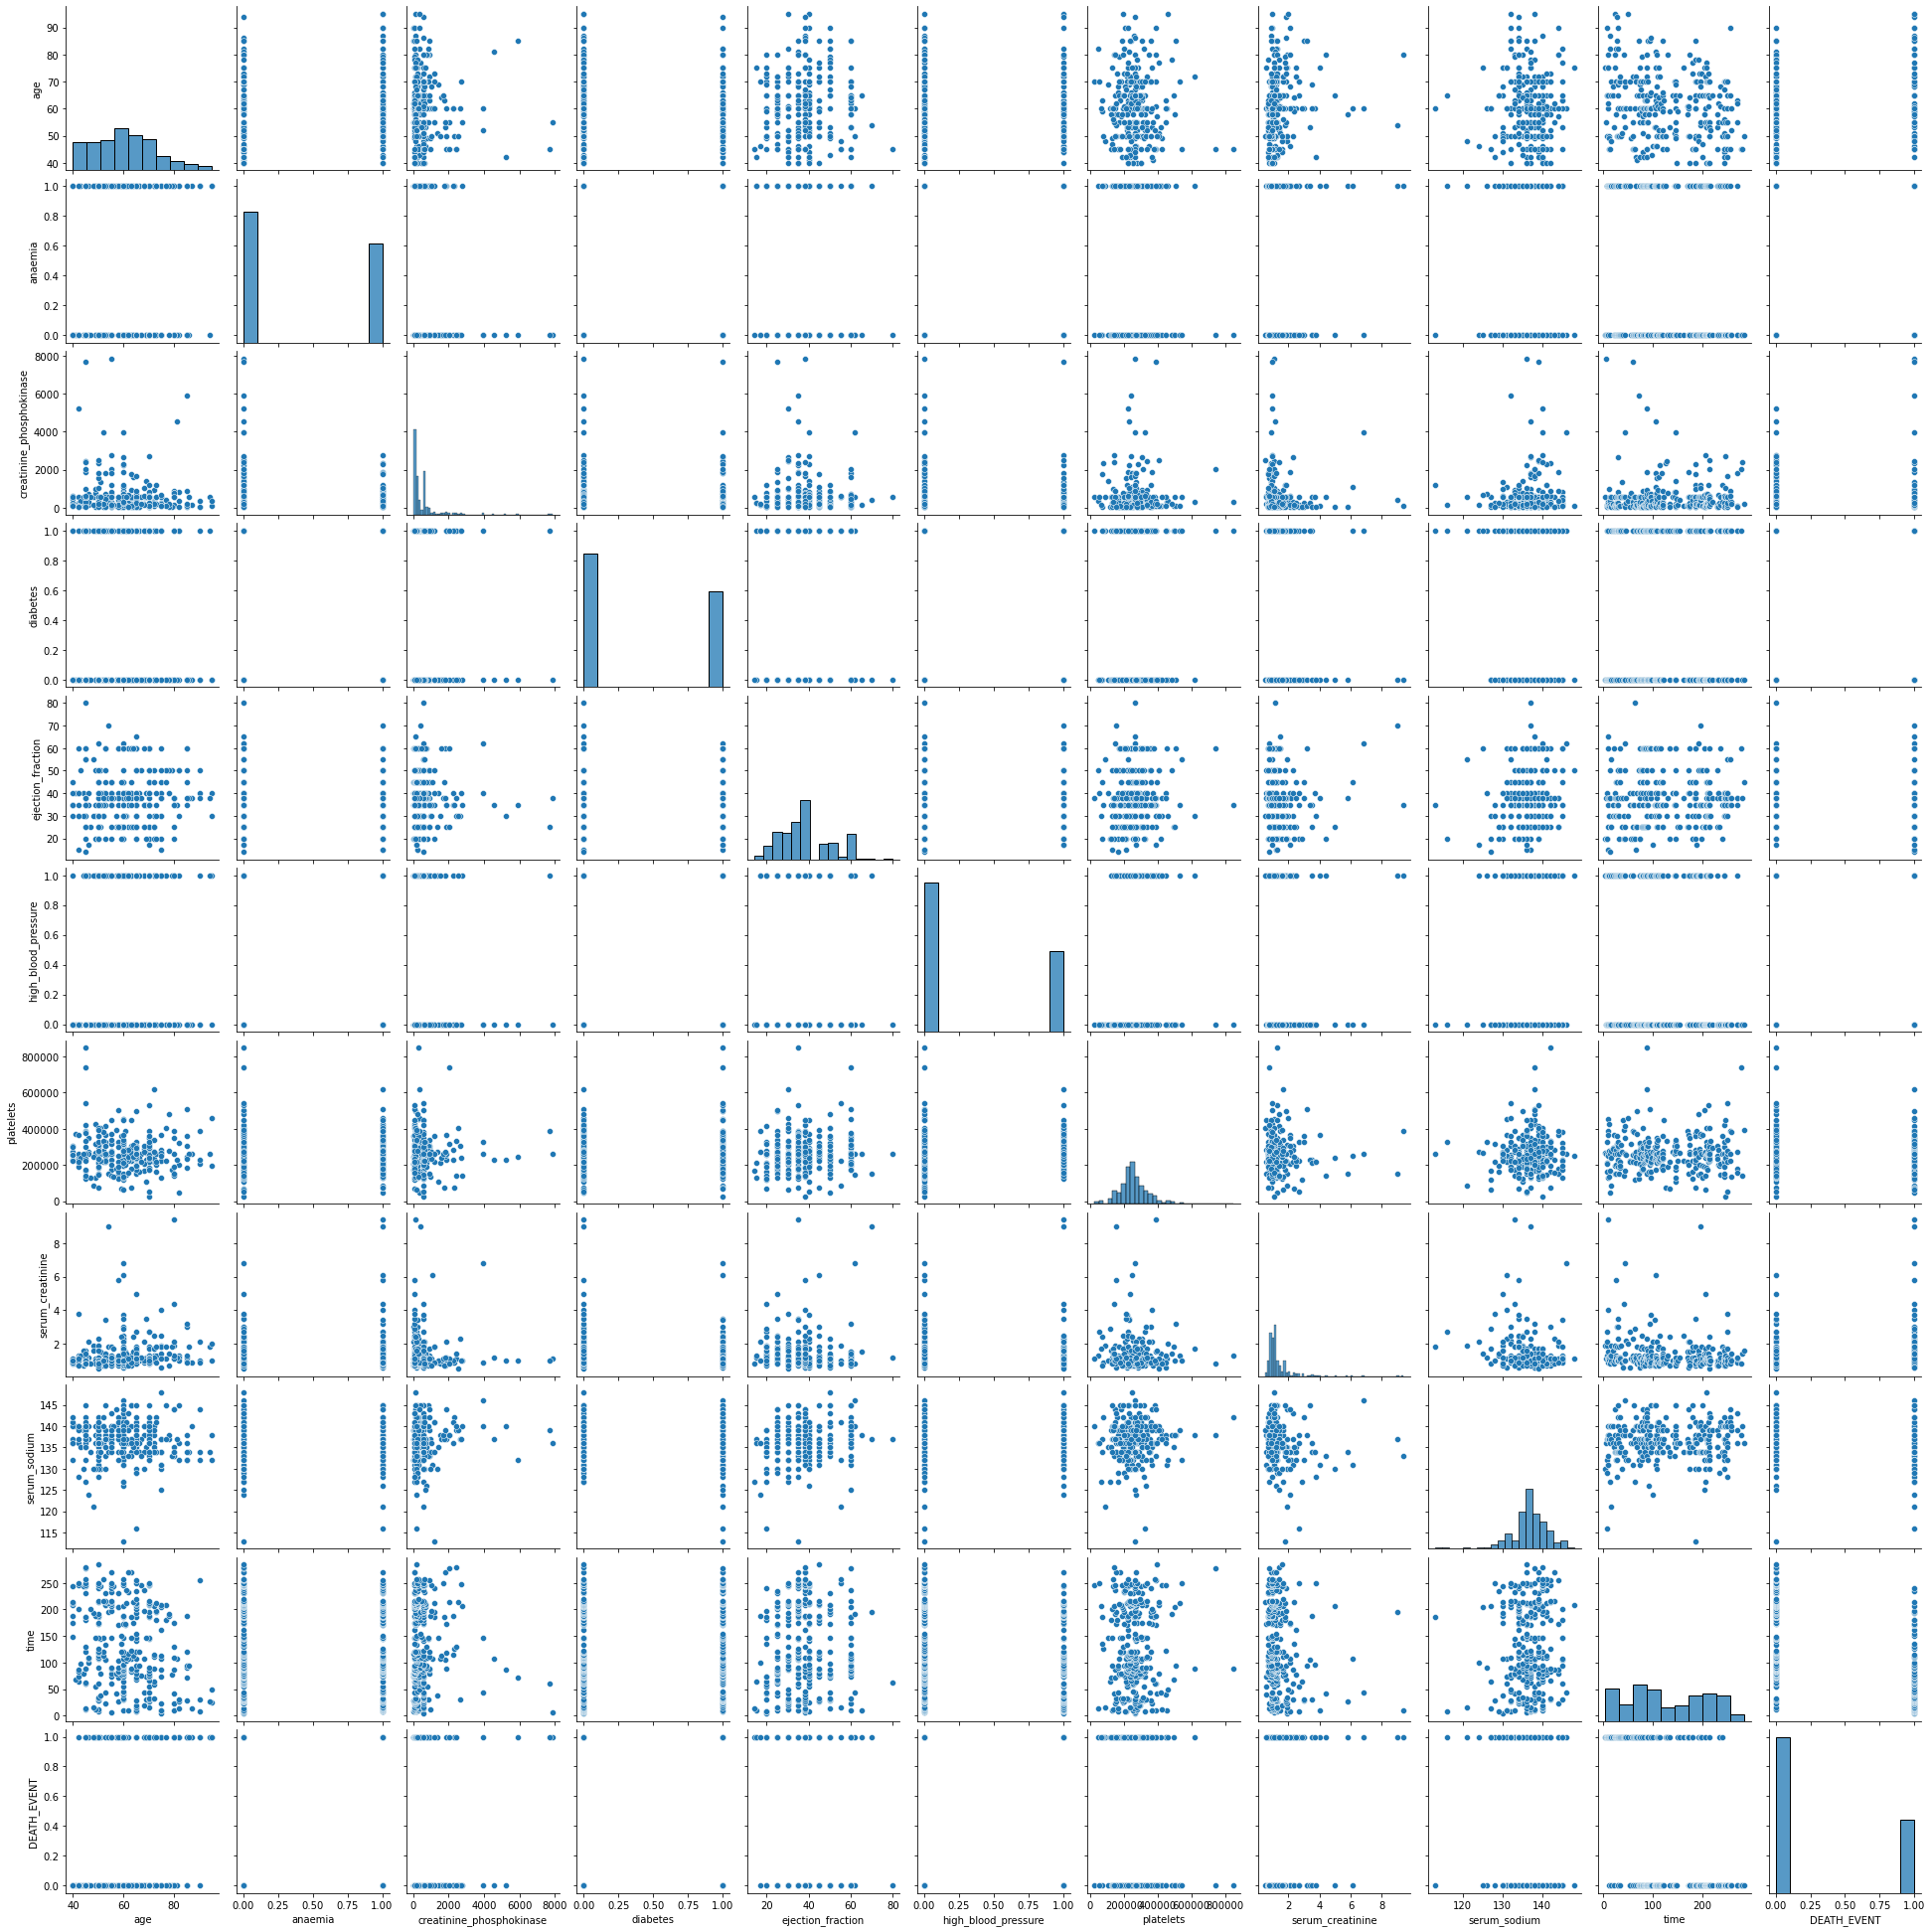

In [13]:
sns.pairplot(data=heart)

Here we can see the trend of our data through the histogram plots

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

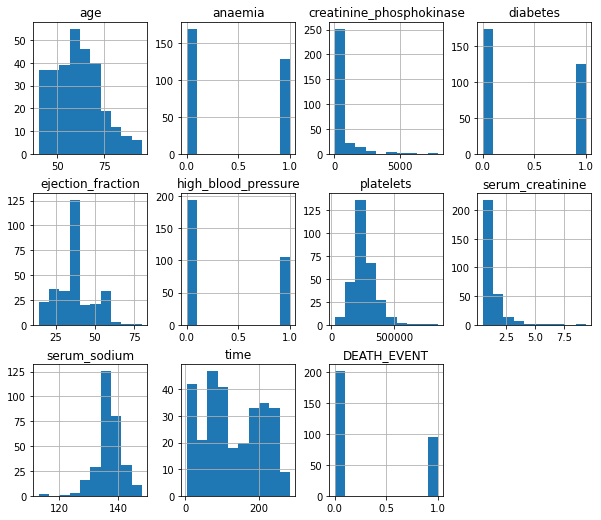

In [14]:
heart.hist(figsize=(10,15),layout=(5,4))

Boxplots helps us to see the outliers and mean values of our features.

age                            AxesSubplot(0.125,0.749828;0.227941x0.130172)
anaemia                     AxesSubplot(0.398529,0.749828;0.227941x0.130172)
creatinine_phosphokinase    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
diabetes                       AxesSubplot(0.125,0.593621;0.227941x0.130172)
ejection_fraction           AxesSubplot(0.398529,0.593621;0.227941x0.130172)
high_blood_pressure         AxesSubplot(0.672059,0.593621;0.227941x0.130172)
platelets                      AxesSubplot(0.125,0.437414;0.227941x0.130172)
serum_creatinine            AxesSubplot(0.398529,0.437414;0.227941x0.130172)
serum_sodium                AxesSubplot(0.672059,0.437414;0.227941x0.130172)
time                           AxesSubplot(0.125,0.281207;0.227941x0.130172)
DEATH_EVENT                 AxesSubplot(0.398529,0.281207;0.227941x0.130172)
dtype: object

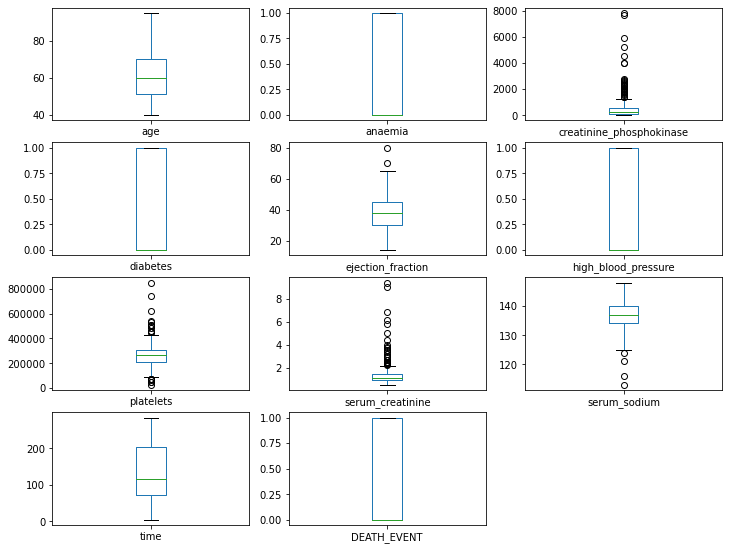

In [15]:
heart.plot(kind='box',subplots=True,figsize=(12,12),layout=(5,3))

This bivariate bar plot helps us to understand how Creatinine Phsohphokinase levels affect male and female patienst and how they vary in case of positive and negative deaths events

<AxesSubplot:xlabel='sex', ylabel='creatinine_phosphokinase'>

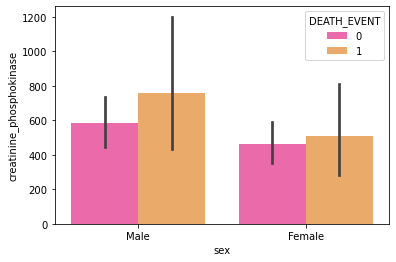

In [16]:
sns.barplot(x='sex',y='creatinine_phosphokinase',hue='DEATH_EVENT',data=heart,palette='spring')

This bivariate bar plot helps us to understand how Serum Sodium levels affect male and female patienst and how they vary in case of positive and negative deaths events

<AxesSubplot:xlabel='smoking', ylabel='creatinine_phosphokinase'>

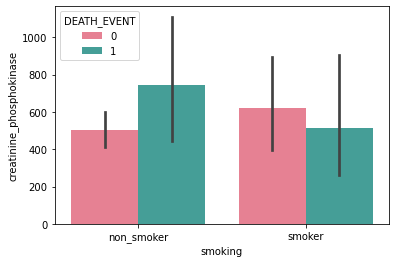

In [17]:
sns.barplot(x='smoking',y='creatinine_phosphokinase',hue='DEATH_EVENT',data=heart,palette='husl')

This is a catplot that helps us to understand serum sodium levels of both Male and Female patients in case both death events.

As we cans the values are concentrated around 130-140 level

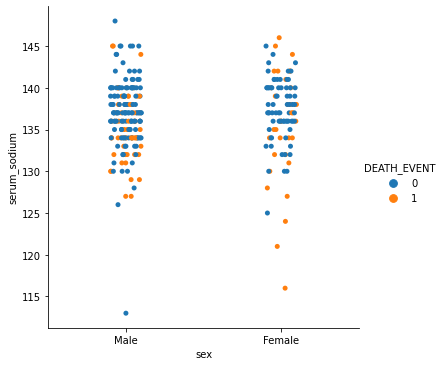

In [18]:
sns.catplot(x='sex',y='serum_sodium',hue='DEATH_EVENT',data=heart) 

This is a catplot that helps us to understand serum sodium levels of both Male and Female patients in case both death events.

As we cans the values are concentrated below 2.

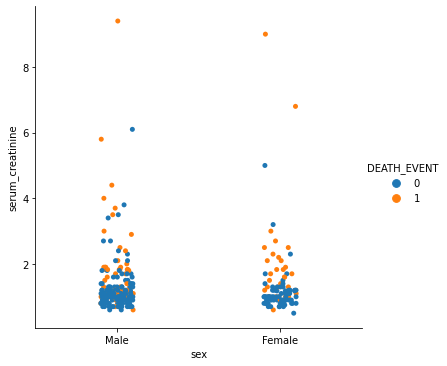

In [19]:
sns.catplot(x='sex',y='serum_creatinine',hue='DEATH_EVENT',data=heart) 

Here is how diabetes levels affect heart failure incidents. 
There has been lesser cases of deaths if the person's diabetes levels are low.

<AxesSubplot:xlabel='diabetes', ylabel='count'>

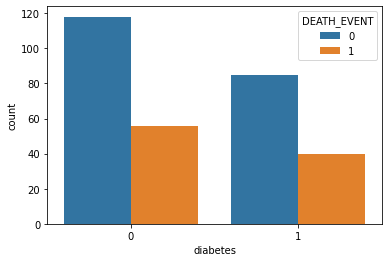

In [20]:
sns.countplot(x='diabetes' ,hue='DEATH_EVENT',data=heart)

Here is how high blood pressure levels affect heart failure incidents. 
There has been lesser cases of deaths if the person's blood pressure levels are low. You can also see the difference of pressure levels between two sexes.

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

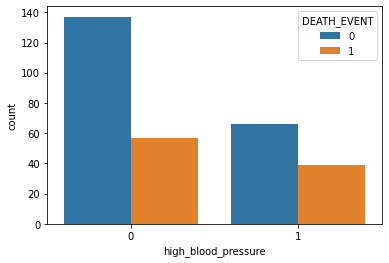

In [21]:
sns.countplot(x='high_blood_pressure' ,hue='DEATH_EVENT',data=heart)

# Preparing the dataframes for prediction model

We will load the data gain to avoid any error.

In [22]:
df=pd.read_csv('heart2.csv')

In [23]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Before we go venture more into machine learning process, let's check if we have any null value in our data frame.

In [24]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

So there is no null value in the data set.

Let's check the skewness of our data. It is checked for preprocessing.

In [25]:
df.skew(axis=0)

age                         0.423062
anaemia                     0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
DEATH_EVENT                 0.770349
dtype: float64

We will make two dataframes from the existing one. One will contain the feature of our model and the other one will be target.

df_factors holds all the feature and data needed to model our data. 

In [26]:
df_factors=df.drop(['DEATH_EVENT'],axis=1)
df_factors
df_deaths=df.DEATH_EVENT
df_deaths


0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

<AxesSubplot:>

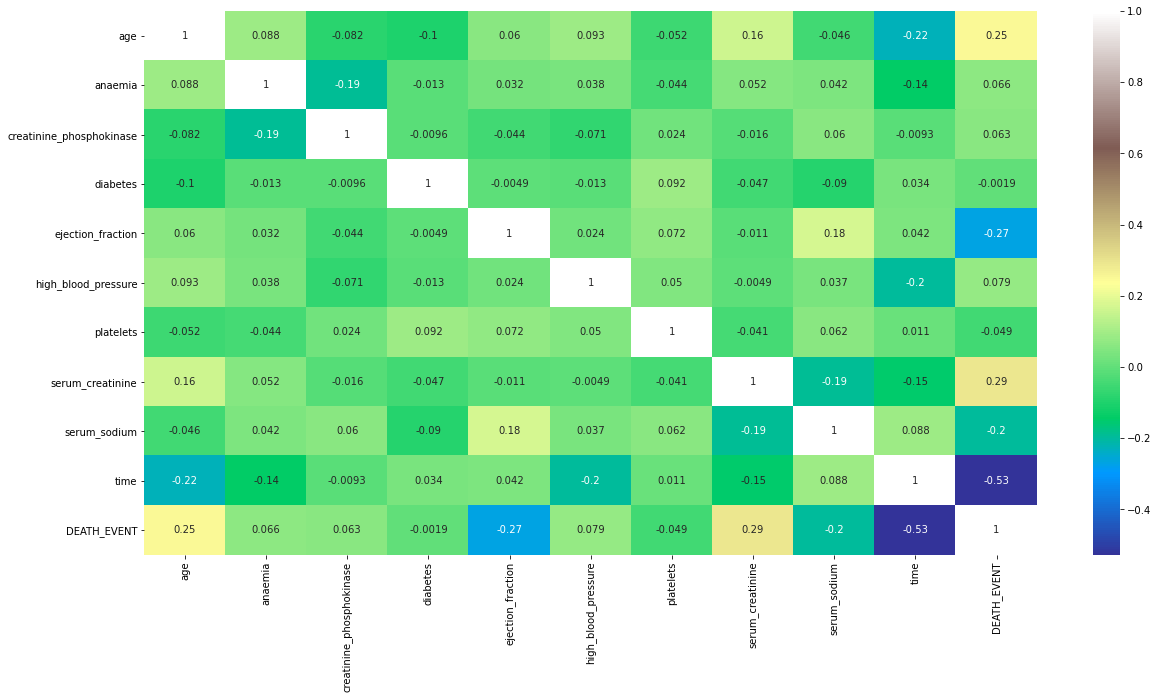

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data=corr,cmap='terrain',annot=True, cbar=True)

Now we will use this lines o code to remove the higher values of correlations to avoid multicolinearity.

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(df_factors, 0.2)
len(set(corr_features))

2

In [31]:
corr_features

{'smoking', 'time'}

As we can see all of our correlation values are low so every features are important to train the model.

# Importing the Classifier algorthm 

We will use the Random Forest Classifier alogrithm from sklearn library

In [32]:
from sklearn.ensemble import RandomForestClassifier
method= RandomForestClassifier()

Creating our train test model

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
df_factors,df_deaths, test_size=0.20)

# Cross Validation and Hyper-parameter Tuning

We will implement Grid Srearch cross validation process to tune our hyper parameters to get the best version of the model. We have supplied a dict values featuring the important factors that improve the algorithm.

In [34]:

from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1, 20, 40, 50], 'criterion': ['gini','entropy'],'max_features': ['auto', 'sqrt', 'log2'],'max_depth':[3,4,5,10,12],'min_samples_split': [3,4,5,8,10]},
              {'n_estimators': [1, 10, 15, 20], 'criterion': ['entropy','gini'],'max_features': ['auto', 'sqrt', 'log2'],'max_depth':[2,3,10,11,14],'min_samples_split': [2,3,4,9,11]}]
grid_search = GridSearchCV(estimator=method, param_grid=parameters, cv= 5,scoring='accuracy',n_jobs=-1)
grid_search = grid_search.fit(X_train, Y_train)



    
               
    

This the score of the best possible model score as produced by the Grid search cross validation process

In [35]:
accuracy = grid_search.best_score_
accuracy

0.874468085106383

These are the best parameters.

In [36]:

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 50}

We are inputing the parameters into our classifier

In [37]:
method= RandomForestClassifier(criterion = 'gini',
 max_depth= 4,
 max_features= 'log2',
 min_samples_split= 8,
 n_estimators= 50)

Before fitting the model let's see the X_train and x_test dataframes.

In [38]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8
107,45.0,1,1876,1,35,0,226000.0,0.9,138,1,0,88
116,60.0,1,96,1,60,1,271000.0,0.7,136,0,0,94
59,72.0,0,364,1,20,1,254000.0,1.3,136,1,1,59
...,...,...,...,...,...,...,...,...,...,...,...,...
257,58.0,0,132,1,38,1,253000.0,1.0,139,1,0,230
169,70.0,0,835,0,35,1,305000.0,0.8,133,0,0,145
226,58.0,1,57,0,25,0,189000.0,1.3,132,1,1,205
95,58.0,1,133,0,60,1,219000.0,1.0,141,1,0,83


In [39]:
Y_train

5      1
4      1
107    0
116    0
59     1
      ..
257    0
169    0
226    0
95     0
230    1
Name: DEATH_EVENT, Length: 239, dtype: int64

# Fitting the model and Predicting target

In [40]:
method.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4, max_features='log2', min_samples_split=8,
                       n_estimators=50)

In [41]:
Y_pred =method.predict(X_test)
Y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

So this is our predicted values.
 let's check the accuracy of the model.

In [42]:
method.score(X_test,Y_test)

0.8833333333333333

# Checking the performance metrics

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8833333333333333

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix



In [45]:
method2=precision_score(Y_test,Y_pred)
method2

0.8181818181818182

In [46]:
method3=recall_score(Y_test,Y_pred)
method3

0.6428571428571429

In [47]:
method4=f1_score(Y_test,Y_pred)
method4

0.7200000000000001

In [48]:
method5=cohen_kappa_score(Y_test,Y_pred)
method5

0.6476510067114094

In [49]:
method6=confusion_matrix(Y_test,Y_pred)
method6 

array([[44,  2],
       [ 5,  9]], dtype=int64)

In [50]:
method7=roc_curve(Y_test,Y_pred)
method7

(array([0.        , 0.04347826, 1.        ]),
 array([0.        , 0.64285714, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [51]:
var1= method.predict_proba(X_test)
var1[:,1]
var2=method.predict_proba(X_train)
var2[:,1]

array([0.81920406, 0.88765191, 0.09346765, 0.09233636, 0.82767223,
       0.30791033, 0.67517617, 0.09436877, 0.51357764, 0.71924228,
       0.0941053 , 0.23717659, 0.05883465, 0.64153872, 0.81163577,
       0.78826849, 0.50300465, 0.33828387, 0.20304005, 0.62761515,
       0.24563999, 0.17458614, 0.1352609 , 0.09713818, 0.22156462,
       0.08474569, 0.60877596, 0.74809042, 0.09038856, 0.07788335,
       0.76000016, 0.77910201, 0.38097281, 0.53481507, 0.14971036,
       0.51665426, 0.57510271, 0.76319175, 0.50091042, 0.13136189,
       0.30559378, 0.44924904, 0.07956842, 0.09236259, 0.10351192,
       0.677321  , 0.3939147 , 0.27561689, 0.08749506, 0.09061649,
       0.7858075 , 0.10431389, 0.09331934, 0.2138492 , 0.11069145,
       0.12082349, 0.19742472, 0.64926908, 0.95085932, 0.64756068,
       0.52635774, 0.86282055, 0.14286572, 0.14424275, 0.19508211,
       0.60721059, 0.70160426, 0.8494706 , 0.11914813, 0.15374831,
       0.79301938, 0.05865487, 0.14518512, 0.57800475, 0.07531

In [52]:
skore1= roc_auc_score(Y_test,var1[:,1])
print(skore1)
skore2= roc_auc_score(Y_train,var2[:,1])
print(skore2)

0.9518633540372671
0.9750660245455959


All the performance metric values are within the safe limit ., so the model is fit to be implemented.

As the last step of the process we will save the predicted value in a csv file for future reference.

In [53]:
Y_pred.tofile('HeartdiseasePrediction.csv', sep = ',')